<a href="https://colab.research.google.com/github/ashraf-badalov/ml-projects/blob/master/KNN_cancer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [164]:
data = pd.read_csv("Cancer_Data(AutoRecovered).csv", usecols= lambda column: column !="Unnamed: 32")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [165]:
data = data.drop("id", axis="columns")
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [166]:
data['diagnosis'] = data['diagnosis'].replace({'M':1, 'B':0})

In [167]:
X = data.iloc[:,1:].values
y = data.iloc[:,:1].values

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [169]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [170]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy of the model is {accuracy} %')

Accuracy of the model is 0.9473684210526315 %


In [171]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[70  2]
 [ 4 38]]


In [172]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f1)

0.9470870627956459


In [ ]:
k_list = list(range(1,50,2))

cv_scores = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
  cv_scores.append(scores.mean())

In [174]:
print(cv_scores)

[0.9099033816425119, 0.9119323671497584, 0.9295652173913043, 0.92743961352657, 0.9296618357487922, 0.9317874396135266, 0.9340096618357489, 0.9208212560386473, 0.918599033816425, 0.918599033816425, 0.9163768115942028, 0.9141545893719807, 0.9097101449275362, 0.9097101449275362, 0.907487922705314, 0.9096618357487923, 0.9074396135265701, 0.9096618357487923, 0.9074396135265701, 0.9073913043478262, 0.9073913043478262, 0.9118357487922706, 0.9096135265700485, 0.9052657004830917, 0.9030434782608696]


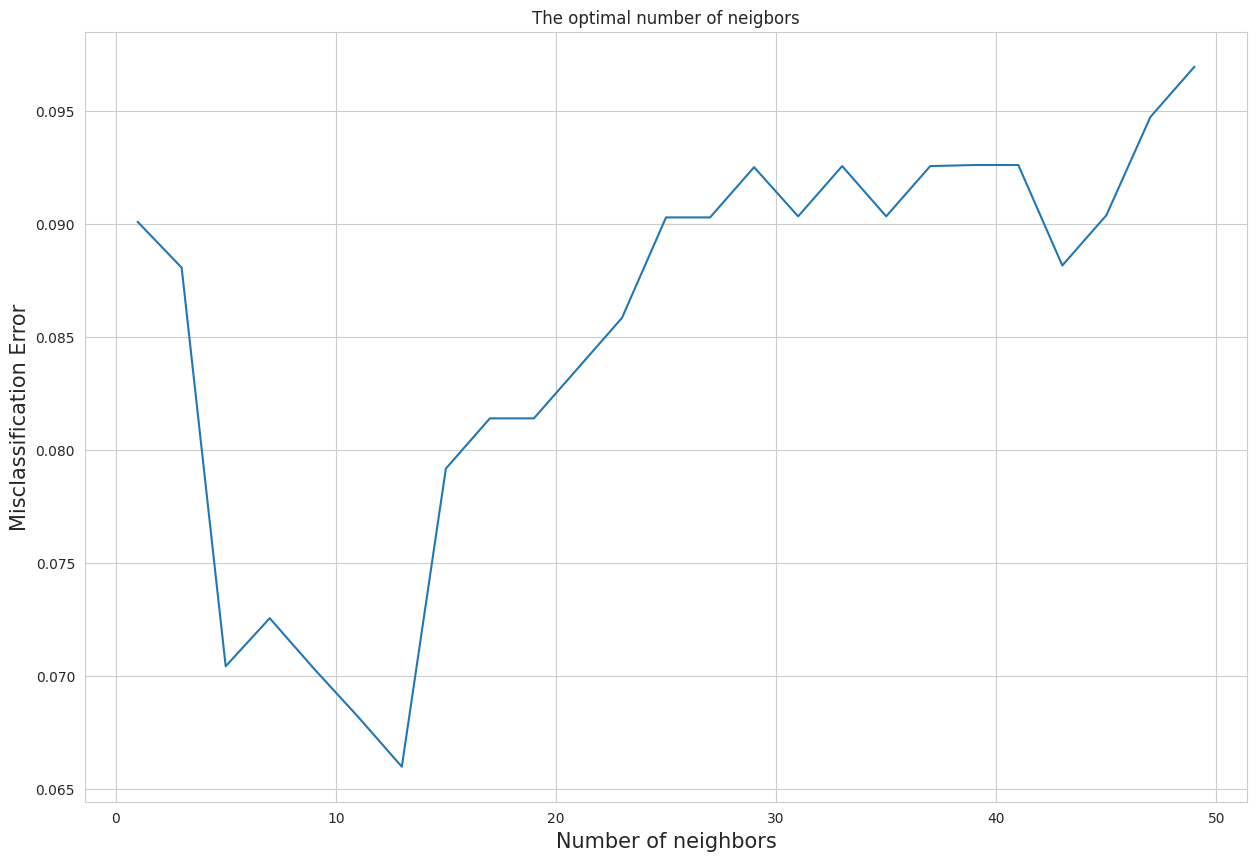

In [175]:
#MSE = Mean Squared Error
MSE = [1-x for x in cv_scores]

plt.figure(figsize=(15,10))
plt.title("The optimal number of neigbors")
plt.xlabel("Number of neighbors", fontsize=15)
plt.ylabel("Misclassification Error", fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

In [176]:
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 13.


##KNN Implementation

In [177]:
X = data.iloc[:,1:].values
y = data.iloc[:,:1].values

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [179]:
X_train = [tuple(x) for x in X_train]
y_train = [tuple(y) for y in y_train]
X_test = [tuple(x) for x in X_test]

In [180]:
from collections import Counter
def euclidean_distance(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += (x1[i] - x2[i]) ** 2
    return np.sqrt(distance)

class KNN:

  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self._predict(x) for x in X]
    return predictions

  def _predict(self, x):
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
    k_indices = np.argsort(distances)[:self.k]
    k_labels = [self.y_train[i] for i in k_indices]

    most_common = Counter(k_labels).most_common()

    return most_common[0][0]

In [181]:
classifier = KNN(k=5)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(predictions)

[(1,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (1,), (0,), (0,), (0,), (1,), (0,), (0,), (1,), (0,), (1,), (1,), (1,), (0,), (1,), (0,), (0,), (1,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (1,), (1,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (1,), (0,), (1,), (1,), (0,), (0,), (0,), (1,), (0,), (1,), (0,), (0,), (0,), (1,), (0,), (1,), (0,), (1,), (1,), (0,), (0,), (0,), (1,), (1,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (0,), (1,), (0,), (0,), (1,), (1,), (0,), (0,), (1,), (1,), (1,), (0,), (1,), (0,), (1,), (0,), (1,), (0,), (1,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (1,), (0,)]


In [182]:
acc = np.sum(predictions == y_test) / len(y_test)
print(acc)

0.9298245614035088
